# Spectrum Generation

We use the data to generate spectra for the incidence of particles on the detector

In [1]:
#Include modules
from accelerate import *
from tqdm.notebook import tqdm

%matplotlib widget

In [2]:
# Read the files

# Parameters
run                     = 'C1_Window'

# Find the files
foldername  = f'./data/{run}'
filenames   = [os.path.join(foldername,filename) for filename in os.listdir(foldername)]

# Print the number of files found
print(f'Found {len(filenames)} data files in {foldername}')

Found 14726 data files in ./data/C1_Window


In [3]:
#List of possible materials
FerroanNoriticAnorthosite = {
    'name' : 'Ferroan Noritic Anorthosite',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Ti\nKa' : 4.51,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
        'Mn\nKa' : 5.90,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
    }
}

Basalt = {
    'name' : 'Basalt',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Fe\nKb' : 7.06,
        'Ti\nKa' : 4.51,
        'Ti\nKb' : 4.93,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
    }
}

PigeoniteBasalt = {
    'name' : 'Pigeonite Basalt',
    'peaks' : {                
        'O\nKa'  : 0.52,
        'Si\nKa' : 1.74,
        'Ti\nKa' : 4.51,
        'Al\nKa' : 1.49,
        'Fe\nKa' : 6.40,
        'Mn\nKa' : 5.90,
        'Mg\nKa' : 1.25,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'P\nKa'  : 2.01,
        'S\nKa'  : 2.30,
        'V\nKa'  : 4.95,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
        'Zr\nKa' : 15.78,

    }
}

ImpactMeltBreccia = {
    'name' : 'Impact Melt Breccia',
    'peaks' : {                
        'O\nKa'  : 0.52,
        'Si\nKa' : 1.74,
        'Ti\nKa' : 4.51,
        'Al\nKa' : 1.49,
        'Fe\nKa' : 6.40,
        'Mn\nKa' : 5.90,
        'Mg\nKa' : 1.25,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'P\nKa'  : 2.01,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
        'Ni\nKa' : 7.48,
        'Ba\nKa' : 32.19,


    }
}

Cm244:   0%|          | 0/5 [00:00<?, ?it/s]

loadFile:   0%|          | 0/3000 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



getEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

loadFile:   0%|          | 0/2726 [00:00<?, ?it/s]

[   EventID  TrackID  MigrantID Particle  InitialEnergy  DepositedEnergy  \
0     3609      108         -1    gamma        3.65596                0   

   XPosition  YPosition  ZPosition  LocalTime            Volume  \
0    7.93541        7.8   -2.32811   0.189112  detectLogical_PV   

     ParentVolume  
0  targetPhysical  ,    EventID  TrackID  MigrantID Particle  InitialEnergy  DepositedEnergy  \
0    35165      104         -1    gamma        5.85866                0   
1    74281      108         -1    gamma        3.65980                0   
2   118093      110         -1    gamma        3.65596                0   
3   165236      109         -1    gamma        3.65980                0   

   XPosition  YPosition  ZPosition  LocalTime            Volume  \
0    6.87235        7.8  -3.912590   3.826150  detectLogical_PV   
1    4.17982        7.8   0.600082   0.524655  detectLogical_PV   
2    6.89838        7.8   1.964680   0.571748  detectLogical_PV   
3    6.20924        7.8  -0.

getEnergy:   0%|          | 0/2726 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/2726 [00:00<?, ?it/s]

loadFile:   0%|          | 0/3000 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



getEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

loadFile:   0%|          | 0/3000 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



getEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

loadFile:   0%|          | 0/3000 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



getEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/3000 [00:00<?, ?it/s]

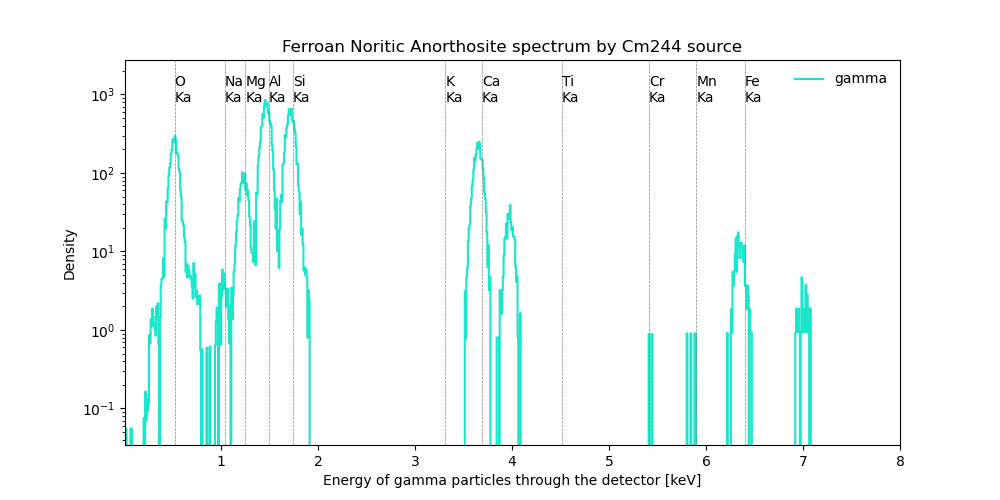

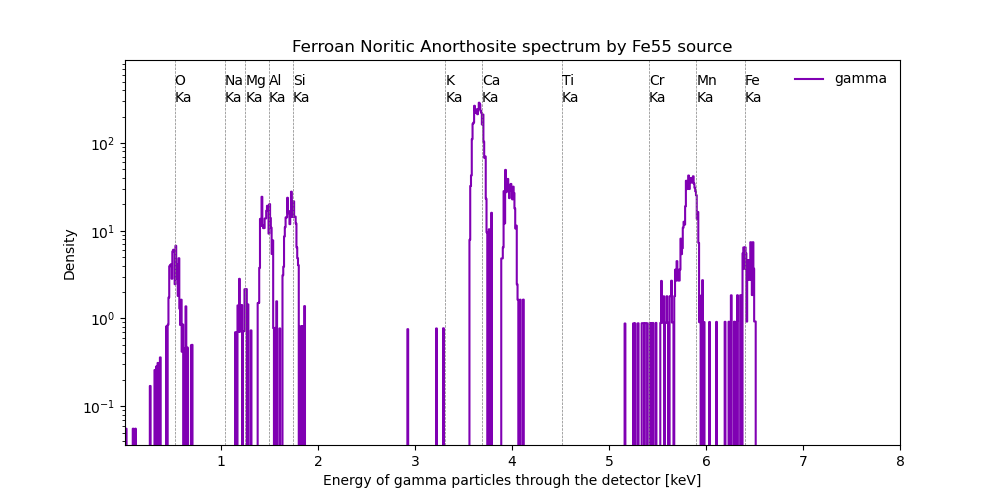

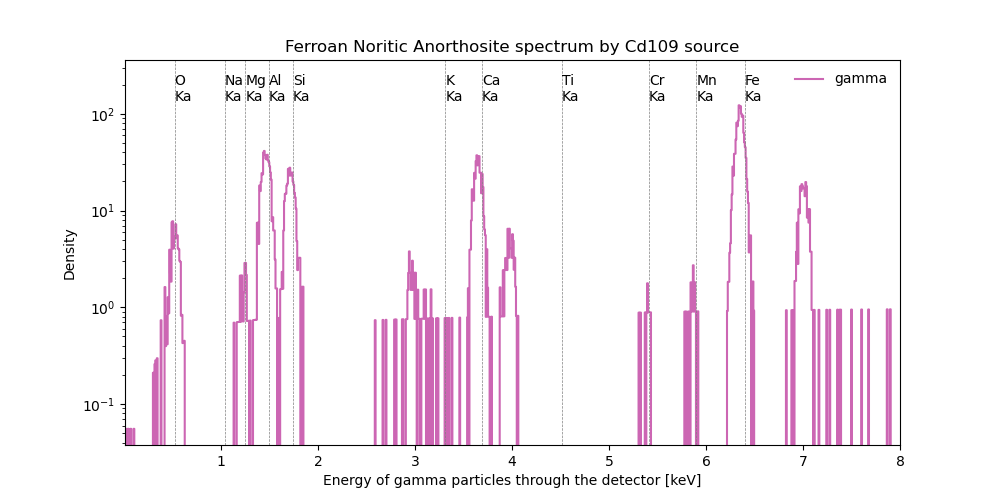

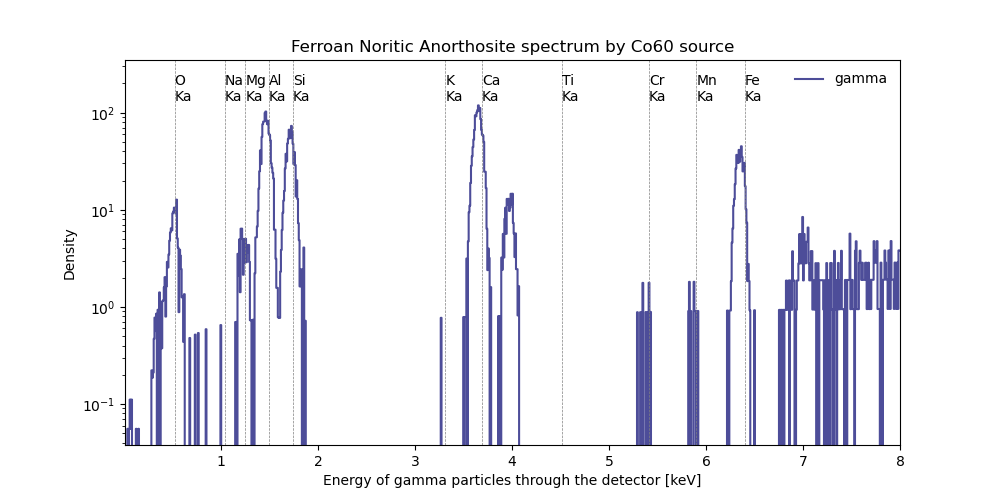

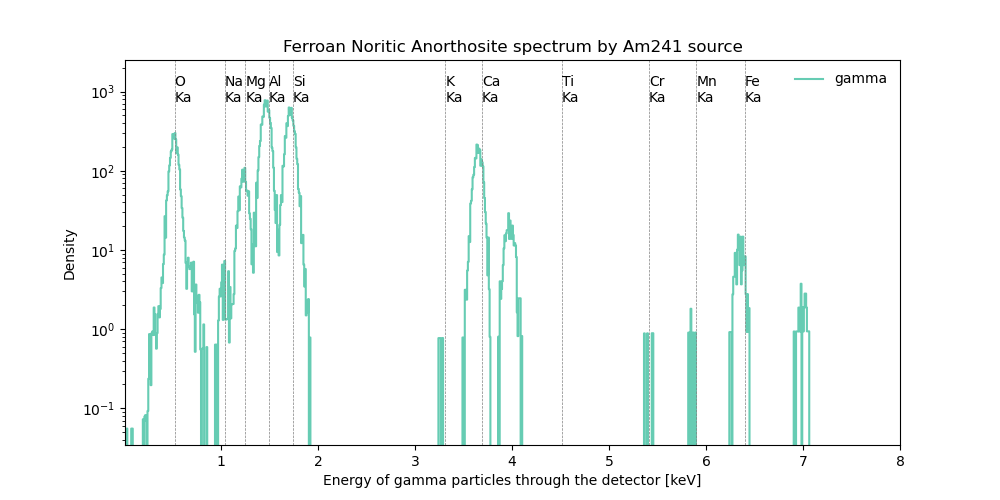

In [4]:
RUN_STRUCTURE = {
    'run0' : 'Cm244',
    'run1' : 'Fe55',
    'run2' : 'Cd109',
    'run3' : 'Co60',
    'run4' : 'Am241'
}

MATERIAL = FerroanNoriticAnorthosite

STD                 = 0.04
particleEnergyList  = {}
PARTICLES           = ['gamma']
EFFICIENCY          = pd.read_csv('./data/SDD_Efficiency/C1.csv', names=['Energy','Efficiency'])

# For all the simulation runs
pbar = tqdm(RUN_STRUCTURE,desc=list(RUN_STRUCTURE.values())[0])
for i,run in enumerate(pbar):
    # Collect their output files
    files = loadFiles([filename for filename in filenames if run in filename])
    print(files)
    

    # Extract the energy for each particle
    particleEnergyList[run] = getParticleEnergiesSmeared(files,
        smearfunc   = smear_gaussian,
        size        = STD,
        groupBy     = 'TrackID',
        columnName  = 'InitialEnergy'
        )
    
    particles = None
    try:
        particles = pd.concat([particleEnergyList[run][p] for p in PARTICLES])
    except:
        pass
    
    # Plot the spectrum
    if particles is not None : plotParticleHistogram(particles,
        source          = RUN_STRUCTURE[run],
        PARTICLE        = ' and '.join(PARTICLES),
        MATERIAL        = MATERIAL,
        SHOW_MATERIAL   = True,
        LIMS            = (0,8),
        MAX_PEAKS       = 0,
        NBINS           = 1000,
        SAVE            = True,
        yscale          = 'log',
        efficiency      = EFFICIENCY)

    # Change the description of the progress bar to show the material processed
    try:
        pbar.set_description(list(RUN_STRUCTURE.values())[i+1])
    except:
        pass

In [5]:
print("The unique particles are:")
for run in particleEnergyList:
    print(f'{run}:',[[particle, len(particleEnergyList[run][particle])] for particle in particleEnergyList[run]])

The unique particles are:
run0: [['gamma', 35648], ['e-', 128], ['neutron', 15]]
run1: [['gamma', 6846], ['e-', 113]]
run2: [['gamma', 542919], ['e-', 107264]]
run3: [['e-', 1002627], ['gamma', 19310]]
run4: [['gamma', 33727], ['e-', 138]]
